# 4. Numpy Basics: Arrays and Vectorized Computation

In [6]:
# To give you an idea of the performance difference, consider a NumPy array of one
# million integers, and the equivalent Python list:

import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [ x * 2 for x in my_list]

# NumPy-based algorithms are generally 10 to 100 times faster (or more) than their
# pure Python counterparts and use significantly less memory.


Wall time: 14 ms
Wall time: 606 ms


## 4.1 The NumPy ndarray: A Multidimensional Array Object

In [7]:
import numpy as np

data = np.random.randn(2, 3)  # Generate some random data
data
 

array([[ 0.67129882, -0.22371185,  1.67509448],
       [ 0.72498675, -0.5536136 , -0.46267877]])

In [8]:
#  mathematical operations with data:

data * 10

array([[ 6.71298823, -2.23711854, 16.75094477],
       [ 7.24986747, -5.53613596, -4.62678773]])

In [9]:
data + data

array([[ 1.34259765, -0.44742371,  3.35018895],
       [ 1.44997349, -1.10722719, -0.92535755]])

In [10]:
data.shape

(2, 3)

In [11]:
data.dtype

dtype('float64')

### Creating ndarrays

In [13]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [17]:
# Nested sequences, like a list of equal-length lists, will be converted into a multidimen‐
# sional array:

data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2, arr2.shape, arr2.ndim

(array([[1, 2, 3, 4],
        [5, 6, 7, 8]]),
 (2, 4),
 2)

In [22]:
arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int32'))

In [23]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
np.zeros((2,3,6))

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

In [28]:
np.empty((2,3,2))

array([[[1.09604370e-311, 2.47032823e-322],
        [0.00000000e+000, 0.00000000e+000],
        [1.33511018e-306, 3.69776220e-062]],

       [[5.20941065e-090, 7.49401146e-067],
        [5.41557172e-067, 1.77599313e+160],
        [3.99910963e+252, 4.91621969e-062]]])

In [30]:
# arange is an array-valued version of the built-in Python range function:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

In [37]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

arr1.dtype, np.dtype('float64'), arr2.dtype

(dtype('float64'), dtype('float64'), dtype('int32'))

In [33]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [38]:
# You can explicitly convert or cast an array from one dtype to another using ndarray’s
# astype method:

arr = np.array([1, 2, 3, 4, 5])
arr.dtype


dtype('int32')

In [41]:
float_arr = arr.astype(np.float64)
float_arr, float_arr.dtype

(array([1., 2., 3., 4., 5.]), dtype('float64'))

In [44]:
# If I cast some floating-point
# numbers to be of integer dtype, the decimal part will be truncated:

arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32) 

array([ 3, -1, -2,  0, 12, 10])

In [47]:
# If you have an array of strings representing numbers, you can use astype to convert
# them to numeric form:

numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float), numeric_strings.dtype

(array([ 1.25, -9.6 , 42.  ]), dtype('S4'))

In [48]:
# You can also use another array’s dtype attribute:

int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [49]:
# There are shorthand type code strings you can also use to refer to a dtype:

empty_uint32 = np.empty(8, dtype='u4')
empty_uint32


array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data
without writing any for loops. NumPy users call this vectorization. Any arithmetic
operations between equal-size arrays applies the operation element-wise:

In [50]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [51]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [52]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [53]:
# Arithmetic operations with scalars propagate the scalar argument to each element in
# the array:

1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [54]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [56]:
# Comparisons between arrays of the same size yield boolean arrays:

arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing

In [61]:
arr = np.arange(10)
print(arr, arr[5], arr[5:8])

arr[5:8] = 12
arr

[0 1 2 3 4 5 6 7 8 9] 5 [5 6 7]


array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [62]:
# To give an example of this, I first create a slice of arr:

arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [63]:
# Now, when I change values in arr_slice, the mutations are reflected in the original
# array arr:

arr_slice[1] = 12345
arr_slice

array([   12, 12345,    12])

In [64]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [67]:
# The “bare” slice [:] will assign to all values in an array:

arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you are new to NumPy, you might be surprised by this, especially if you have used
other array programming languages that copy data more eagerly. As NumPy has been
designed to be able to work with very large arrays, you could imagine performance
and memory problems if NumPy insisted on always copying data.


If you want a copy of a slice of an ndarray instead of a view, you
will need to explicitly copy the array—for example,
arr[5:8].copy().


In [100]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [73]:
# Thus, individual elements can be accessed recursively. But that is a bit too much
# work, so you can pass a comma-separated list of indices to select individual elements.
# So these are equivalent:

arr2d[0][2], arr2d[0,2]



(3, 3)

In [76]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d, arr3d.shape, arr3d.ndim

(array([[[ 1,  2,  3],
         [ 4,  5,  6]],
 
        [[ 7,  8,  9],
         [10, 11, 12]]]),
 (2, 2, 3),
 3)

In [77]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [78]:
old_values = arr3d[0].copy()
arr3d[0] = 42

In [79]:
 arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [80]:
arr3d[0] = old_values

In [81]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [83]:
arr3d, arr3d[1,0]

(array([[[ 1,  2,  3],
         [ 4,  5,  6]],
 
        [[ 7,  8,  9],
         [10, 11, 12]]]),
 array([7, 8, 9]))

In [86]:
x = arr3d[1]
x, x[0]

(array([[ 7,  8,  9],
        [10, 11, 12]]),
 array([7, 8, 9]))

#### Indexing with slices

In [87]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [88]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [101]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [90]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [91]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [93]:
arr2d[1, :2]

array([4, 5])

In [104]:
arr2d[:2, 2], arr2d[:2, 2:]


(array([3, 6]),
 array([[3],
        [6]]))

In [95]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

In [96]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [97]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [ ]:
 arr2d[:2, 2]

### Boolean indexing

In [106]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

data = np.random.randn(7, 4)

names, data


(array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4'),
 array([[-1.47220354,  0.45796884, -0.52964017,  0.51409053],
        [ 0.47943992, -0.74959219,  0.65747143, -0.42245882],
        [ 1.99009132, -2.13980129,  0.39680433, -0.40900093],
        [-0.69704496,  1.89562289, -0.4570847 , -1.29776843],
        [-0.55477148, -0.08725632,  2.11992181, -1.44797943],
        [-0.6478364 , -1.19490205,  1.47384918, -0.443832  ],
        [-0.2619718 , -0.28859983,  0.33247714, -1.47787631]]))

In [108]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [110]:
data[names == 'Bob']

array([[-1.47220354,  0.45796884, -0.52964017,  0.51409053],
       [-0.69704496,  1.89562289, -0.4570847 , -1.29776843]])

In [120]:
data[[0,3] ,1]

array([0.45796884, 1.89562289])

In [121]:
data[names == 'Bob', 2:]

array([[-0.52964017,  0.51409053],
       [-0.4570847 , -1.29776843]])

In [122]:
data[names == 'Bob', 3]

array([ 0.51409053, -1.29776843])

In [123]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [124]:
data[~(names == 'Bob')]

array([[ 0.47943992, -0.74959219,  0.65747143, -0.42245882],
       [ 1.99009132, -2.13980129,  0.39680433, -0.40900093],
       [-0.55477148, -0.08725632,  2.11992181, -1.44797943],
       [-0.6478364 , -1.19490205,  1.47384918, -0.443832  ],
       [-0.2619718 , -0.28859983,  0.33247714, -1.47787631]])

In [126]:
cond = names == 'Bob'

data[cond], data[~cond]

(array([[-1.47220354,  0.45796884, -0.52964017,  0.51409053],
        [-0.69704496,  1.89562289, -0.4570847 , -1.29776843]]),
 array([[ 0.47943992, -0.74959219,  0.65747143, -0.42245882],
        [ 1.99009132, -2.13980129,  0.39680433, -0.40900093],
        [-0.55477148, -0.08725632,  2.11992181, -1.44797943],
        [-0.6478364 , -1.19490205,  1.47384918, -0.443832  ],
        [-0.2619718 , -0.28859983,  0.33247714, -1.47787631]]))

In [127]:
# Selecting two of the three names to combine multiple boolean conditions, use
# boolean arithmetic operators like & (and) and | (or):

mask = (names == 'Bob') | (names == 'Will')
data[mask]


array([[-1.47220354,  0.45796884, -0.52964017,  0.51409053],
       [ 1.99009132, -2.13980129,  0.39680433, -0.40900093],
       [-0.69704496,  1.89562289, -0.4570847 , -1.29776843],
       [-0.55477148, -0.08725632,  2.11992181, -1.44797943]])

In [128]:
# Setting values with boolean arrays works in a common-sense way. To set all of the
# negative values in data to 0 we need only do:

data[data < 0] = 0
data


array([[0.        , 0.45796884, 0.        , 0.51409053],
       [0.47943992, 0.        , 0.65747143, 0.        ],
       [1.99009132, 0.        , 0.39680433, 0.        ],
       [0.        , 1.89562289, 0.        , 0.        ],
       [0.        , 0.        , 2.11992181, 0.        ],
       [0.        , 0.        , 1.47384918, 0.        ],
       [0.        , 0.        , 0.33247714, 0.        ]])

In [129]:
# Setting whole rows or columns using a one-dimensional boolean array is also easy:

data[names != 'Joe'] = 7
data


array([[7.        , 7.        , 7.        , 7.        ],
       [0.47943992, 0.        , 0.65747143, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 1.47384918, 0.        ],
       [0.        , 0.        , 0.33247714, 0.        ]])

### Fancy Indexing

In [131]:
arr = np.empty((8, 4))

for i in range(8):
    arr[i] = i

arr


array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [132]:
# To select out a subset of the rows in a particular order, you can simply pass a list 
# or ndarray of integers specifying the desired order:

arr[[4, 3, 0, 6]]


array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [133]:
# Hopefully this code did what you expected! Using negative indices selects rows from
# the end:

arr[[-3, -5, -7]] # 5, 3, 1

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [134]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [144]:
# Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected. Regardless of
# how many dimensions the array has (here, only 2), the result of fancy indexing is
# always one-dimensional.

arr[[1,5,7,2], [0,3,1,2]] 

array([ 4, 23, 29, 10])

In [149]:
 arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [ ]:
# Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array.

### Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the under‐
lying data without copying anything. Arrays have the transpose method and also the
special T attribute:


In [150]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [151]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [152]:
# When doing matrix computations, you may do this very often—for example, when
# computing the inner matrix product using np.dot:

arr = np.random.randn(6, 3)
arr


array([[ 0.52995182, -0.94034413,  1.28779158],
       [ 1.6560404 , -1.78983651,  0.16196171],
       [-0.66104422,  0.38565399,  0.33894497],
       [ 0.42284462,  0.56090047, -0.27275217],
       [ 1.63447748, -0.15711466, -1.09429959],
       [-0.23326204, -1.13225614, -0.73429055]])

In [153]:
np.dot(arr.T, arr)

array([[ 6.36502358, -3.47282723, -1.0060327 ],
       [-3.47282723,  5.85778914, -0.51978809],
       [-1.0060327 , -0.51978809,  3.61059038]])

In [154]:
# For higher dimensional arrays, transpose will accept a tuple of axis numbers to per‐
# mute the axes (for extra mind bending):

arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [155]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [156]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [157]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 4.2 Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results

In [169]:
# Many ufuncs are simple element-wise transformations, like sqrt or exp:

arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [160]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [161]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [162]:
# Here, numpy.maximum computed the element-wise maximum of the elements in x and y.

x = np.random.randn(8)
y = np.random.randn(8)

np.maximum(x, y)


array([ 0.93229645,  1.98268867,  0.03691617,  1.22807681,  1.90017621,
        0.69061308, -0.18809731,  1.24353892])

In [163]:

arr

array([ -1.84911536,  -0.23085014,   1.35479628, -11.20512829,
        -0.56008144,   2.94091327,   0.84826404])

In [170]:
arr = np.random.randn(7) * 5
print(arr)

remainder, whole_part = np.modf(arr)
remainder, whole_part

[ 0.08264445 -2.62231667  1.30233793 -0.9113828   4.93713428  2.11249339
 -0.5144227 ]


(array([ 0.08264445, -0.62231667,  0.30233793, -0.9113828 ,  0.93713428,
         0.11249339, -0.5144227 ]),
 array([ 0., -2.,  1., -0.,  4.,  2., -0.]))

In [171]:
# Ufuncs accept an optional out argument that allows them to operate in-place on arrays:

arr

array([ 0.08264445, -2.62231667,  1.30233793, -0.9113828 ,  4.93713428,
        2.11249339, -0.5144227 ])

In [172]:
np.sqrt(arr)

C:\Users\USER\AppData\Local\Temp/ipykernel_17568/2296558006.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([0.28747948,        nan, 1.14120022,        nan, 2.22196631,
       1.45344191,        nan])

In [173]:
arr

array([ 0.08264445, -2.62231667,  1.30233793, -0.9113828 ,  4.93713428,
        2.11249339, -0.5144227 ])

In [174]:
np.sqrt(arr, arr)

C:\Users\USER\AppData\Local\Temp/ipykernel_17568/269955669.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([0.28747948,        nan, 1.14120022,        nan, 2.22196631,
       1.45344191,        nan])

In [175]:
arr

array([0.28747948,        nan, 1.14120022,        nan, 2.22196631,
       1.45344191,        nan])

## 4.3 Array-Oriented Programming with Arrays

In [177]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)

In [178]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [179]:
z = np.sqrt(xs **2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

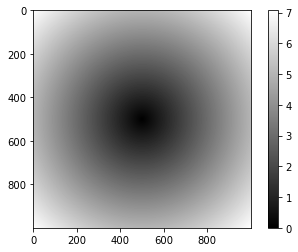

In [180]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

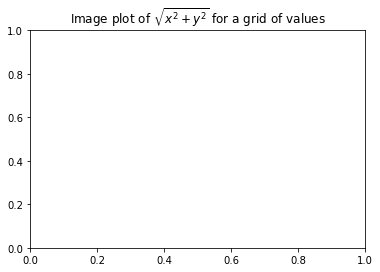

In [181]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


### Expressing Conditional Logical as Array Operations

The numpy.where function is a vectorized version of the ternary expression x if con
dition else y. Suppose we had a boolean array and two arrays of values:


In [188]:
# Suppose we wanted to take a value from xarr whenever the corresponding value in
# cond is True, and otherwise take the value from yarr. A list comprehension doing
# this might look like:

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [189]:
# The second and third arguments to np.where don’t need to be arrays; one or both of
# them can be scalars. A typical use of where in data analysis is to produce a new array
# of values based on another array. Suppose you had a matrix of randomly generated
# data and you wanted to replace all positive values with 2 and all negative values with
# –2. This is very easy to do with np.where:

arr = np.random.randn(4, 4)
arr


array([[ 2.31892949, -0.22105139, -0.61912561,  1.47930193],
       [ 1.01722208,  0.14425242,  0.58576855,  0.23618097],
       [ 0.7156145 ,  0.23491449,  0.02304065,  0.52048105],
       [ 0.34408601, -0.70605624, -1.69197852, -0.13783328]])

In [190]:
arr > 0

array([[ True, False, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True, False, False, False]])

In [191]:
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2,  2],
       [ 2,  2,  2,  2],
       [ 2,  2,  2,  2],
       [ 2, -2, -2, -2]])

In [192]:
# You can combine scalars and arrays when using np.where. For example, I can replace
# all positive values in arr with the constant 2 like so:

np.where(arr > 0, 2, arr)

array([[ 2.        , -0.22105139, -0.61912561,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [ 2.        , -0.70605624, -1.69197852, -0.13783328]])

### Mathematical and Statistical Methodss

In [193]:
# Here I generate some normally distributed random data and compute some aggregate statistics:

arr = np.random.randn(5, 4)
arr

array([[-1.09106845,  0.56456702, -1.50438675, -0.87655591],
       [ 0.20266173, -0.36711155,  0.32248645,  0.80437424],
       [-0.65610632, -0.20758983,  0.28818599, -0.71672551],
       [ 0.25682108,  0.91420619,  0.79874146,  0.29226961],
       [-1.91327621,  0.78617636, -1.07033478, -0.16661157]])

In [194]:
arr.mean()

-0.16696383762865735

In [195]:
np.mean(arr)

-0.16696383762865735

In [196]:
arr.sum()

-3.3392767525731473

In [200]:
# Functions like mean and sum take an optional axis argument that computes the statis‐
# tic over the given axis, resulting in an array with one fewer dimension:

arr.mean(axis=1), arr.mean(1)

(array([-0.72686102,  0.24060272, -0.32305892,  0.56550958, -0.59101155]),
 array([-0.72686102,  0.24060272, -0.32305892,  0.56550958, -0.59101155]))

In [201]:
arr.sum(axis=0), arr.sum(0)

(array([-3.20096817,  1.69024819, -1.16530763, -0.66324913]),
 array([-3.20096817,  1.69024819, -1.16530763, -0.66324913]))

In [202]:
# Other methods like cumsum and cumprod do not aggregate, instead producing an array
# of the intermediate results:

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [203]:
# In multidimensional arrays, accumulation functions like cumsum return an array of
# the same size, but with the partial aggregates computed along the indicated axis
# according to each lower dimensional slice:

arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumsum(axis=0)


array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [204]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus,
sum is often used as a means of counting True values in a boolean array:S

In [210]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

56

In [213]:
# There are two additional methods, any and all, useful especially for boolean arrays.
# any tests whether one or more values in an array is True, while all checks if every
# value is True:

bools = np.array([False, False, True, False])

bools.any(), bools.all()


(True, False)

### Sorting

Like Python’s built-in list type, NumPy arrays can be sorted in-place with the sort
method:


In [214]:
arr = np.random.randn(6)
arr

array([-1.85930376,  0.20429827, -1.85451644,  1.43577064, -0.26710148,
       -0.24535491])

In [215]:
arr.sort()

In [216]:
arr

array([-1.85930376, -1.85451644, -0.26710148, -0.24535491,  0.20429827,
        1.43577064])

In [217]:
# You can sort each one-dimensional section of values in a multidimensional array inplace along an axis by passing the axis number to sort:

arr = np.random.randn(5, 3)
arr


array([[-0.26274305, -1.96424755,  0.97689655],
       [ 0.5094391 ,  1.24914358,  0.31189542],
       [ 1.10016399, -0.14004769, -0.00786654],
       [ 1.20833345, -0.93119843, -0.2075864 ],
       [ 0.06514931,  0.11880629, -1.27078217]])

In [219]:
arr.sort(1)
arr 

array([[-1.96424755, -0.26274305,  0.97689655],
       [ 0.31189542,  0.5094391 ,  1.24914358],
       [-0.14004769, -0.00786654,  1.10016399],
       [-0.93119843, -0.2075864 ,  1.20833345],
       [-1.27078217,  0.06514931,  0.11880629]])

In [221]:
  large_arr = np.random.randn(1000)

  large_arr.sort()
  large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6676119067937847

### Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. A commonly
used one is np.unique, which returns the sorted unique values in an array:


In [227]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [228]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [230]:
# Contrast np.unique with the pure Python alternative:
sorted(set(names))


['Bob', 'Joe', 'Will']

In [233]:
# Another function, np.in1d, tests membership of the values in one array in another,
# returning a boolean array:

values = np.array([6, 0, 0, 3, 2, 5, 6])
 
np.in1d(values, [2, 3, 6]) # values의 값이 [2, 3, 6] 이면 True, 아니면 False 

array([ True, False, False,  True,  True, False,  True])

## 4.4 File Input and Output with Arrays

NumPy is able to save and load data to and from disk either in text or binary format.
In this section I only discuss NumPy’s built-in binary format, since most users will
prefer pandas and other tools for loading text or tabular data (see Chapter 6 for much
more).

In [235]:
# np.save and np.load are the two workhorse functions for efficiently saving and load‐
# ing array data on disk. Arrays are saved by default in an uncompressed raw binary
# format with file extension .npy:

arr = np.arange(10)
np.save('examples/some_array', arr)


In [237]:
np.load('examples/some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [240]:
# You save multiple arrays in an uncompressed archive using np.savez and passing the
# arrays as keyword arguments:

np.savez('array_archive.npz', a=arr, b=arr)

arch = np.load('array_archive.npz')
arch['b'], arch['a']


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [247]:
# If your data compresses well, you may wish to use numpy.savez_compressed instead:

np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)
arch_comp = np.load('arrays_compressed.npz')
arch_comp['a'], arch_comp['b']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

## 4.5 Linear Algebra (선형대수)

In [248]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [249]:
# x.dot(y) is equivalent to np.dot(x, y):

np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [250]:
 np.dot(x, np.ones(3))

array([ 6., 15.])

In [251]:
np.ones(3)

array([1., 1., 1.])

In [252]:
# The @ symbol (as of Python 3.5) also works as an infix operator that performs matrix
# multiplication:

x @ np.ones(3)


array([ 6., 15.])

In [253]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [254]:
 np.ones(3)

array([1., 1., 1.])

In [255]:
from numpy.linalg import inv, qr
X = np.random.rand(5,5)
mat = X.T.dot(X)
inv(mat)

array([[  37.34880748,  -80.7137241 ,  -29.00514189,    9.66806981,
          50.65230139],
       [ -80.7137241 ,  214.45778404,   89.82807045,  -30.08598753,
        -151.49051398],
       [ -29.00514189,   89.82807045,   47.94791846,  -14.53286054,
         -71.42474518],
       [   9.66806981,  -30.08598753,  -14.53286054,    5.48946173,
          22.79582213],
       [  50.65230139, -151.49051398,  -71.42474518,   22.79582213,
         115.41223863]])

In [256]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  1.09002759e-14, -7.97999125e-15,
        -4.11580821e-15, -3.57155889e-14],
       [-2.10020062e-14,  1.00000000e+00, -1.07888713e-14,
        -6.96213899e-15, -4.82893259e-14],
       [-4.91874941e-15,  1.14231845e-14,  1.00000000e+00,
        -3.97839068e-15, -6.41322372e-15],
       [-1.70518726e-14,  1.72729635e-14, -1.29066050e-14,
         1.00000000e+00, -2.74643450e-15],
       [-4.31230137e-15,  7.78063614e-15,  1.30836897e-14,
        -7.47709663e-16,  1.00000000e+00]])

In [257]:
q, r = qr(mat)

In [258]:
r

array([[-1.96879842, -2.28440911, -1.55218453, -1.97928685, -2.70891062],
       [ 0.        , -0.12164465, -0.31922083,  0.03479361, -0.36870222],
       [ 0.        ,  0.        , -0.20172915, -0.45794789, -0.03178801],
       [ 0.        ,  0.        ,  0.        , -0.90824446,  0.18063309],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00474279]])

## 4.6 Pseudorandom Number Generation

The numpy.random module supplements the built-in Python random with functions
for efficiently generating whole arrays of sample values from many kinds of probabil‐
ity distributions

In [259]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 1.8254781 , -1.64134469, -0.49128728, -0.08349801],
       [-2.25805318, -2.43824844, -0.3833781 ,  0.26339838],
       [-0.03261604,  0.8839042 , -1.0316354 ,  1.01984797],
       [ 0.84603024, -1.68834891, -0.54238039, -0.1998549 ]])

In [260]:
from random import normalvariate

N = 1000000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

730 ms ± 3.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
23.9 ms ± 395 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [263]:
np.random.seed(1234)
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## 4.7 Example: Random Walks

The simulation of random walks provides an illustrative application of utilizing array
operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and
–1 occurring with equal probability.


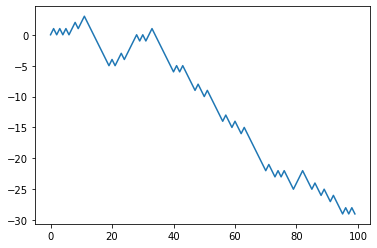

In [301]:
# Here is a pure Python way to implement a single random walk with 1,000 steps using
# the built-in random module:

import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step 

    walk.append(position)

plt.plot(walk[:100])


In [264]:
import random
position = 0
walk = [position]
walk

[0]

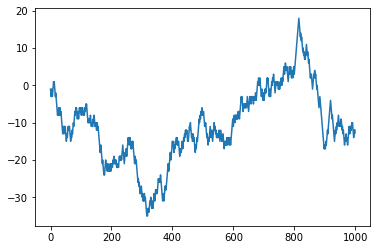

In [315]:
nsteps = 1000

draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
plt.plot(walk)

In [316]:
# From this we can begin to extract statistics like the minimum and maximum value
# along the walk’s trajectory:
walk.min(), walk.max()


(-35, 18)

In [317]:
(np.abs(walk) >= 10).argmax()

37

In [318]:
walk[37], walk[36], walk[38]






(-10, -9, -11)

In [319]:
(np.abs(walk).argmax())

316

In [320]:
walk[315], walk[316], walk[317], 

(-34, -35, -34)

### Simulating Many Random Walks at Once

In [327]:
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

(5000, 1000)

In [330]:
# Now, we can compute the maximum and minimum values obtained over all of the walks:

walks.max(), walks.min()

(122, -107)

In [336]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3405

In [338]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

497.5668135095448

In [339]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))
steps

array([[ 0.12009065,  0.1433117 , -0.29625784, ...,  0.30422875,
        -0.11755531,  0.10826353],
       [-0.0760105 ,  0.16406112, -0.26667621, ...,  0.12353763,
        -0.19077609, -0.0438912 ],
       [ 0.182198  ,  0.27612506,  0.15188256, ..., -0.02240756,
         0.26358967,  0.02202186],
       ...,
       [-0.5246185 ,  0.08145114,  0.33518387, ..., -0.39011309,
         0.20005832,  0.02544206],
       [ 0.42808822,  0.2908016 ,  0.47967189, ..., -0.07674463,
         0.12477511, -0.04469095],
       [ 0.235801  ,  0.16965702, -0.23120977, ..., -0.19521544,
        -0.20386278, -0.01448565]])

## 4.8 Conclusion
